# Actividad2

Precio Dolar respecto al sol peruano.

https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01234PM/html

In [1]:
# instala paquetes necesarios
install.packages("tseries")

library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



## 1. Lectura y transformaciones iniciales

In [2]:
# lectura de datos
df <- read.csv("data.csv")
head(df, 2)

,Fecha,TipoCambio
,<chr>,<dbl>
1,Ene92,0.9879545
2,Feb92,0.9715000


In [3]:
# Transformamos datos a formato fecha apropiado para poder tener valores

meses_en_espanol <- c("Ene", "Feb", "Mar", "Abr", "May", "Jun", 
                      "Jul", "Ago", "Sep", "Oct", "Nov", "Dic")

meses_en_ingles <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                     "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

# Reemplazar los nombres de los meses en la columna de fecha
for (i in 1:length(meses_en_espanol)) {
  df$Fecha <- gsub(meses_en_espanol[i], meses_en_ingles[i], df$Fecha)
}

# Convertir la columna de fecha a un formato de fecha estándar
df$Fecha <- as.Date(paste0("01-", df$Fecha), format = "%d-%b%y")
head(df)


,Fecha,TipoCambio
,<date>,<dbl>
1,1992-01-01,0.9879545
2,1992-02-01,0.9715000
3,1992-03-01,0.9550000
4,1992-04-01,1.0215000
5,1992-05-01,1.1310000
6,1992-06-01,1.1783333


completo datos para verificar si hay datos faltantes

In [4]:
# Crear una secuencia de fechas completas desde la primera hasta la última fecha
fecha_inicio <- min(df$Fecha)
fecha_fin <- max(df$Fecha)

fechas_completas <- seq(from = fecha_inicio, to = fecha_fin, by = "month")
# Crear un data frame con las fechas completas
datos_completos <- data.frame(Fecha = fechas_completas)

# Unir los datos completos con los datos originales
datos_completos <- merge(datos_completos, df, by = "Fecha", all.x = TRUE)


## 2. Descripcion de los datos

In [5]:
# Descripción del dataframe datos_completos
summary(datos_completos)

# Buscar valores faltantes en el dataframe
valores_faltantes <- sum(is.na(datos_completos$TipoCambio))
cat("Número de valores faltantes en la columna 'TipoCambio':", valores_faltantes, "\n")

     Fecha              TipoCambio   
 Min.   :1992-01-01   Min.   :0.955  
 1st Qu.:2000-02-22   1st Qu.:2.760  
 Median :2008-04-16   Median :3.241  
 Mean   :2008-04-16   Mean   :3.054  
 3rd Qu.:2016-06-08   3rd Qu.:3.468  
 Max.   :2024-08-01   Max.   :4.107  

Número de valores faltantes en la columna 'TipoCambio': 0 


In [6]:
# CANTIDAD DE REGISTROS
cantidad_registros <- nrow(datos_completos)
cat("Cantidad de registros en el dataframe datos_completos:", cantidad_registros, "\n")

Cantidad de registros en el dataframe datos_completos: 392 


In [7]:
# Obtener estadísticas descriptivas adicionales
media <- mean(datos_completos$TipoCambio, na.rm = TRUE)
mediana <- median(datos_completos$TipoCambio, na.rm = TRUE)
desviacion_estandar <- sd(datos_completos$TipoCambio, na.rm = TRUE)
moda <- as.numeric(names(sort(table(datos_completos$TipoCambio), decreasing = TRUE)[1]))

cat("Media del Tipo de Cambio:", media, "\n")
cat("Mediana del Tipo de Cambio:", mediana, "\n")
cat("Desviación Estándar del Tipo de Cambio:", desviacion_estandar, "\n")
cat("Moda del Tipo de Cambio:", moda, "\n")

Media del Tipo de Cambio: 3.054411 
Mediana del Tipo de Cambio: 3.240978 
Desviación Estándar del Tipo de Cambio: 0.5763696 
Moda del Tipo de Cambio: 3.248375 


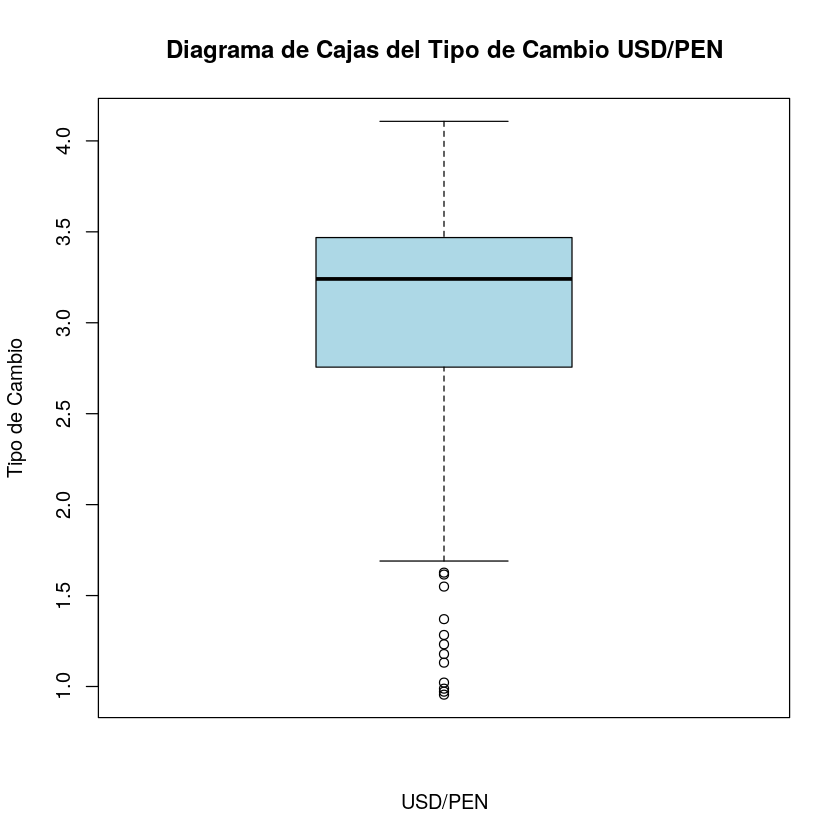

In [8]:
# Crear un diagrama de cajas para el Tipo de Cambio
boxplot(datos_completos$TipoCambio, main = "Diagrama de Cajas del Tipo de Cambio USD/PEN",
    ylab = "Tipo de Cambio", xlab = "USD/PEN", col = "lightblue")

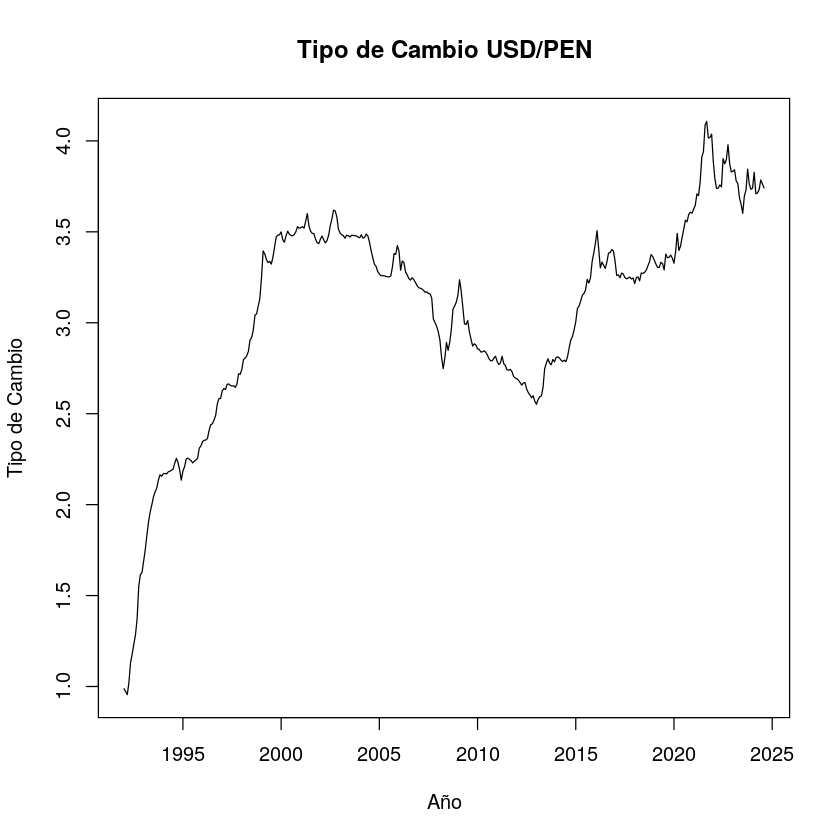

In [9]:
# Graficar la serie temporal
serie_completa <- ts(datos_completos$TipoCambio, start = c(1992, 1), frequency = 12)
plot(serie_completa, main = "Tipo de Cambio USD/PEN", 
     ylab = "Tipo de Cambio", xlab = "Año")


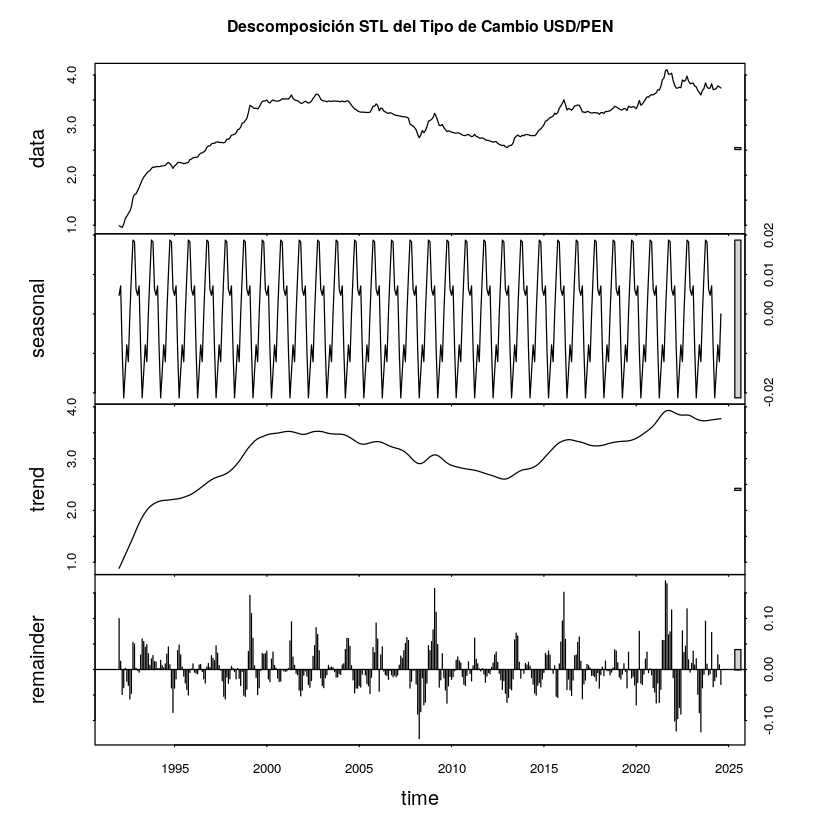

In [10]:
# Aplicar el método STL a la serie temporal
descomposicion_stl <- stl(serie_completa, s.window = "periodic")

# Graficar la descomposición
plot(descomposicion_stl, main = "Descomposición STL del Tipo de Cambio USD/PEN")

In [11]:
# Realizar la prueba de Dickey-Fuller aumentada (ADF)
# De acuerdo a p-valor serie seria no estacionaria


adf_test <- adf.test(serie_completa, alternative = "stationary")
print(adf_test)


	Augmented Dickey-Fuller Test

data:  serie_completa
Dickey-Fuller = -3.039, Lag order = 7, p-value = 0.1384
alternative hypothesis: stationary



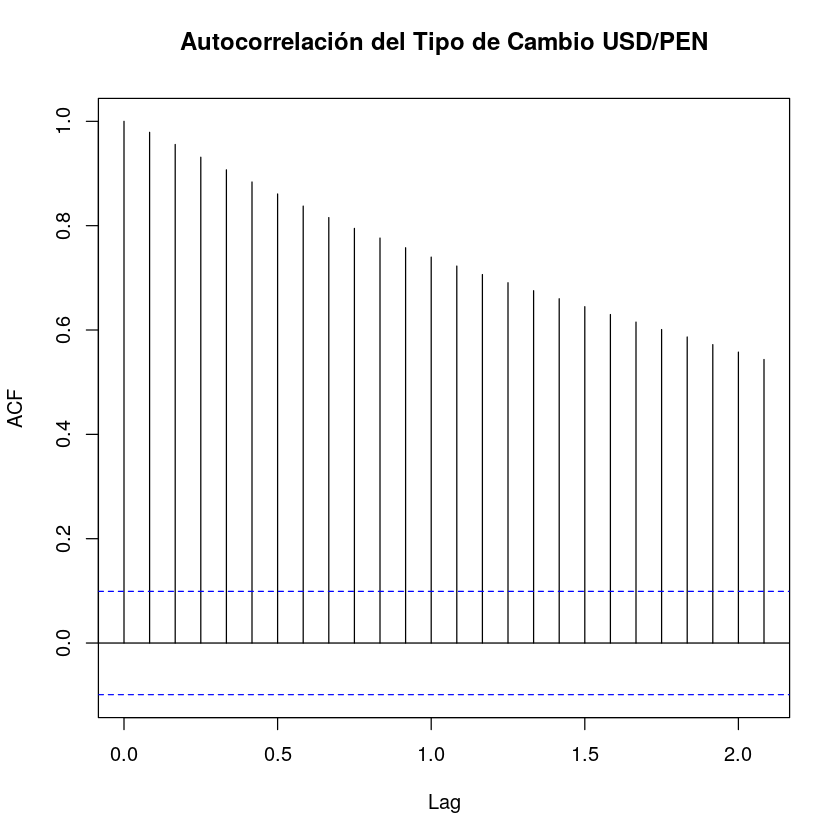

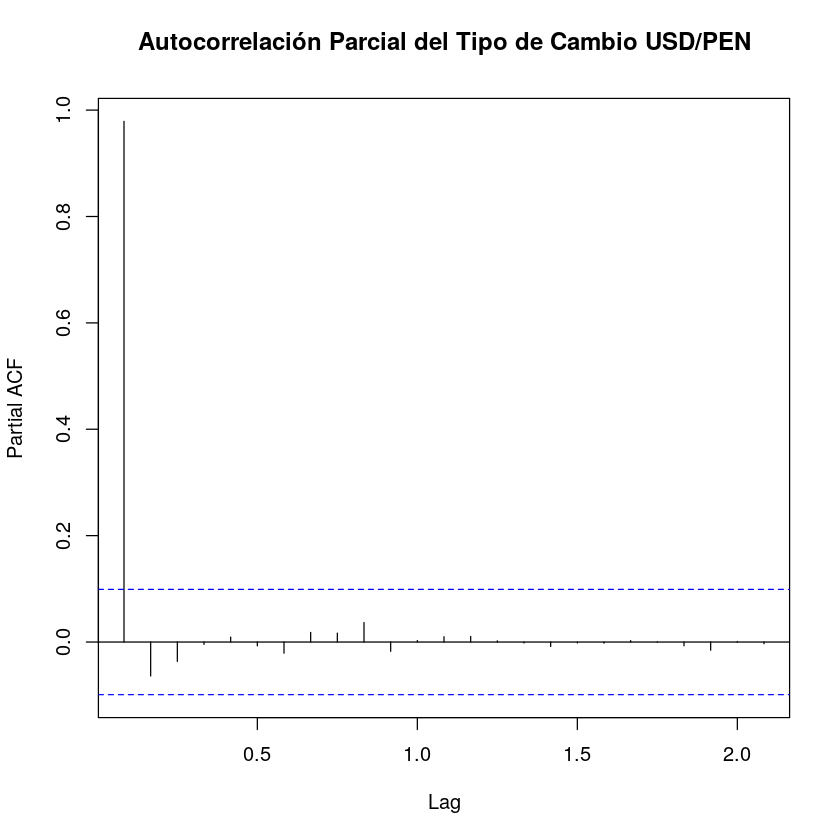

In [12]:
# Calcular la autocorrelación y la autocorrelación parcial
acf(serie_completa, main = "Autocorrelación del Tipo de Cambio USD/PEN")
pacf(serie_completa, main = "Autocorrelación Parcial del Tipo de Cambio USD/PEN")